# Linear Regression by Umar Anzar

## Import Libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Import Dataset

In [2]:
dataset = pd.read_csv('student_scores.csv')
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Plot 2d Graph

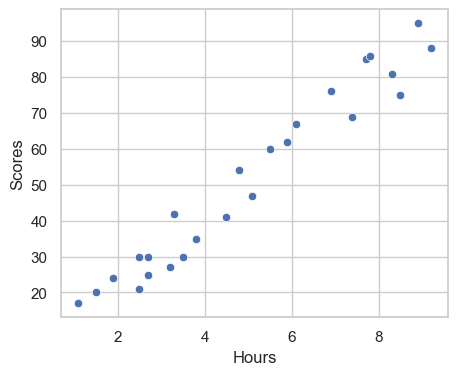

In [3]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid")

sns.scatterplot(x='Hours',y='Scores',data=dataset)
plt.show()

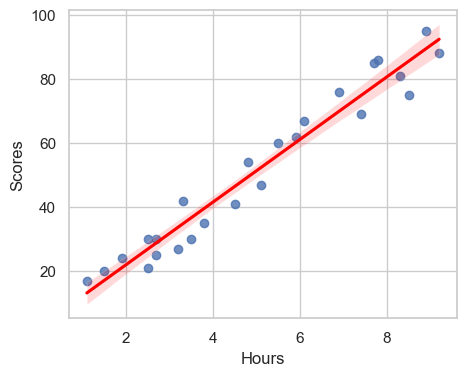

In [4]:
sns.regplot(x='Hours',y='Scores',data=dataset, line_kws={"color": "red"})
plt.show()

## Preparing X and Y

In [5]:
x = dataset.iloc[:,:1].values
y = dataset.iloc[:,-1].values

## Predicting Dataset

### Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)
m = model.coef_
c = model.intercept_
Y_axis = m*x + c

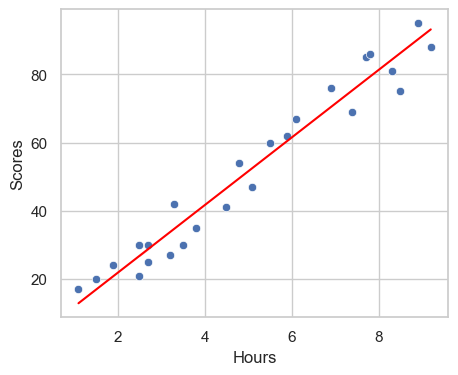

In [8]:
sns.scatterplot(x='Hours',y='Scores',data=dataset)
sns.lineplot(x=x.flatten(),y=Y_axis.flatten(), color='red')
plt.show()

### Prediction

In [9]:
y_pred = model.predict(test_x)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Evaluation

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('mean_squared_error', mean_squared_error(test_y, y_pred), '\n',
      'mean_absolute_error', mean_absolute_error(test_y, y_pred), '\n',
      'r2_score', r2_score(test_y, y_pred))

mean_squared_error 21.598769307217413 
 mean_absolute_error 4.18385989900298 
 r2_score 0.9454906892105355


#### Error Function

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'mean_squared_error':mse, 'mean_absolute_error':mae, 'r2_score':r2}

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

errorDf = pd.DataFrame(columns=['random_state', 'mean_squared_error', 'mean_absolute_error', 'r2_score'])

model = LinearRegression()
for rdmState in range(1,200,5):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = rdmState)
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x)
    result = error(test_y, pred_y)
    result['random_state'] = rdmState
    errorDf = errorDf.append(result, ignore_index=True)

errorDf.head(5)

,random_state,mean_squared_error,mean_absolute_error,r2_score
0,1.0,68.880921,7.882398,0.842103
1,6.0,18.765475,4.230413,0.972394
2,11.0,78.660909,8.237073,0.881990
3,16.0,50.029620,6.682278,0.835299
4,21.0,30.680774,5.332780,0.884031


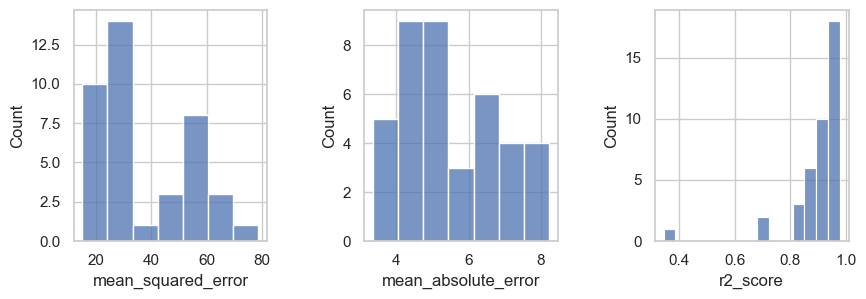

In [13]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# Plot histograms for each column on a separate subplot
sns.histplot(data=errorDf, x='mean_squared_error', ax=axes[0])
sns.histplot(data=errorDf, x='mean_absolute_error', ax=axes[1])
sns.histplot(data=errorDf, x='r2_score', ax=axes[2])
plt.show()

In [14]:
errorDf.drop('random_state', axis=1).agg(['mean','median']).transpose()

,mean,median
mean_squared_error,37.598356,30.740782
mean_absolute_error,5.546015,5.288847
r2_score,0.901040,0.926632
